# Libraries

In [1]:
import stanza
import gensim
from gensim import interfaces, utils
import pandas as pd
import texthero as hero
from texthero import preprocessing
import nltk
from nltk.corpus import stopwords
import re
import numpy as np
from pprint import pprint
import logging
import texthero as hero
from texthero import preprocessing
import pandas as pd
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
import warnings
warnings.filterwarnings("ignore")
import csv
csv.field_size_limit()
131072
csv.field_size_limit(256 << 10)
131072
csv.field_size_limit()
262144
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Make your stopwords
#nltk.download('stopwords')
stop_words = stopwords.words('english')

/home/ggnicolau/miniconda3/envs/jupyter-1/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'texthero'

In [135]:
# Load file
df = pd.read_csv("C:/Users/user/Documents/1. GitHub/Projeto 17-Constitutions/full_table.csv")
#Preprocess: Remove urls
df['clean_title'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
#Preprocess: Remove /n
df['clean_title']= df['clean_title'].replace('\n',' ')
# Remove column
#df.drop('Unnamed: 0',
#  axis='columns', inplace=True)
# Rename link column
#df.rename(columns={"0": "link"}, inplace=True)


# Preprocess automate Hero with no Lem
# create a custom cleaning pipeline
custom_pipeline = [preprocessing.fillna
                , preprocessing.lowercase
                , preprocessing.remove_punctuation
                , preprocessing.remove_digits
                , preprocessing.remove_diacritics
                #, preprocessing.remove_stopwords
                , preprocessing.remove_whitespace
                #, preprocessing.stem
               ]
# Clean numbers and dates
#df['clean_title'] = df['clean_title'].apply(lambda x: re.sub('\d{1,2}h\d\d', '', x))
df['clean_title'] = df['clean_title'].str.replace(r'\d+','')
# pass the custom_pipeline to the pipeline argument
df['clean_title'] = hero.clean(df['clean_title'], pipeline=custom_pipeline)
# Erase stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['clean_title'] = df['clean_title'].apply(lambda x: ' '.join(
    [word for word in x.split() if word not in (stop_words)]))
df.head()

# Extract your train variable from table
train_text = df['clean_title']
train_text.head()

# Clean NaNs
df = df.dropna()
# Save table
df.to_csv("clean_table.csv", index=False)
allDone()

In [8]:
df

,link,country,year,name,text,clean_title
0,https://www.constituteproject.org/constitution...,Afghanistan,2004,Afghanistan 2004 Constitution - Constitute,"['In the name of Allah, the Most Beneficent, t...",name allah beneficent merciful praise allah ch...
1,https://www.constituteproject.org/constitution...,Afghanistan,1964,Afghanistan 1964 Constitution - Constitute,"['In the Name of God, The Almighty and The Jus...",name god almighty organize national life afgha...
2,https://www.constituteproject.org/constitution...,Albania,2016,Albania 1998 (rev. 2016) Constitution - Consti...,"['We, the people of Albania, proud and aware o...",people albania proud aware history responsibil...
4,https://www.constituteproject.org/constitution...,Algeria,2020,Algeria 2020 Constitution - Constitute,"['Translated by International IDEA', 'The Alge...",translated international idea algerian people ...
5,https://www.constituteproject.org/constitution...,Andorra,1993,Andorra 1993 Constitution - Constitute,"['The Andorran People, with full liberty and i...",andorran people full liberty independence exer...
...,...,...,...,...,...,...
224,https://www.constituteproject.org/constitution...,Venezuela,2009,Venezuela (Bolivarian Republic of) 1999 (rev. ...,"['English Translation of amended Articles 160,...",english translation amended articles (c) willi...
225,https://www.constituteproject.org/constitution...,Yemen,2015,Yemen 1991 (rev. 2015) Constitution - Constitute,['The appended 2015 Transitional Declaration w...,appended transitional declaration translated u...
226,https://www.constituteproject.org/constitution...,Yemen_D,2015,Yemen 2015 Constitution - Constitute,['Drafted by the Constitutional Drafting Commi...,drafted constitutional drafting committee tran...
227,https://www.constituteproject.org/constitution...,Zambia,2016,Zambia 1991 (rev. 2016) Constitution - Constitute,"['WE, THE PEOPLE OF ZAMBIA:', 'ACKNOWLEDGE the...",people zambia acknowledge supremacy god almigh...


# Tokenize and vectorize

In [2]:
df = pd.read_csv('clean_table.csv')

In [7]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
stopwords = nltk.corpus.stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [8]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [9]:
test = df['text']
test = df['text'].str.strip('[')
test = test.str.strip(']')
test

0      'In the name of Allah, the Most Beneficent, th...
1      'In the Name of God, The Almighty and The Just...
2      'We, the people of Albania, proud and aware of...
3      'Translated by International IDEA', 'The Alger...
4      'The Andorran People, with full liberty and in...
                             ...                        
201    'English Translation of amended Articles 160, ...
202    'The appended 2015 Transitional Declaration wa...
203    'Drafted by the Constitutional Drafting Commit...
204    'WE, THE PEOPLE OF ZAMBIA:', 'ACKNOWLEDGE the ...
205    'We the people of Zimbabwe,', 'United in our d...
Name: text, Length: 206, dtype: object

In [10]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in df['clean_title']:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [11]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 2742377 items in vocab_frame


In [12]:
print (vocab_frame.head())
print
print
print
print

              words
name           name
allah         allah
benefic  beneficent
merci      merciful
prais        praise


<function print>

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_title']) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

[nltk_data] Downloading package punkt to /home/ggnicolau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/ggnicolau/miniconda3/envs/jupyter-1/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'wher

(206, 4316)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_title']) #fit the vectorizer to synopses

print(tfidf_matrix.shape)
#allDone()

CPU times: user 43.9 s, sys: 220 ms, total: 44.1 s
Wall time: 44.1 s
(206, 4316)


In [16]:
terms = tfidf_vectorizer.get_feature_names()
terms

/home/ggnicolau/miniconda3/envs/jupyter-1/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


["'s",
 'abandon',
 'abid',
 'abil',
 'abl',
 'abolish',
 'abolit',
 'abroad',
 'abrog',
 'absenc',
 'absenc presid',
 'absent',
 'absolut',
 'absolut major',
 'absolut major member',
 'absolut major vote',
 'abus',
 'academ',
 'access inform',
 'access public',
 'accompani',
 'accomplish',
 'accord articl',
 'accord condit',
 'accord constitut',
 'accord constitut law',
 'accord decis',
 'accord follow',
 'accord general',
 'accord law n',
 'accord n',
 'accord n n',
 'accord principl',
 'accord procedur',
 'accord provis',
 'accord provis articl',
 'accord provis constitut',
 'accord provis law',
 'accord rule',
 'accord term',
 'account act',
 'account govern',
 'account n',
 'account n n',
 'account nation',
 'account public',
 'account shall',
 'account state',
 'accredit',
 'accus',
 'accus person',
 'achiev',
 'acknowledg',
 'acquisit',
 'acquit',
 'acquitt',
 'act accord',
 'act act',
 'act commit',
 'act constitut',
 'act govern',
 'act law',
 'act member',
 'act n',
 'act n n

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

In [18]:
df

,link,country,year,name,text,clean_title
0,https://www.constituteproject.org/constitution...,Afghanistan,2004,Afghanistan 2004 Constitution - Constitute,"['In the name of Allah, the Most Beneficent, t...",name allah beneficent merciful praise allah ch...
1,https://www.constituteproject.org/constitution...,Afghanistan,1964,Afghanistan 1964 Constitution - Constitute,"['In the Name of God, The Almighty and The Jus...",name god almighty organize national life afgha...
2,https://www.constituteproject.org/constitution...,Albania,2016,Albania 1998 (rev. 2016) Constitution - Consti...,"['We, the people of Albania, proud and aware o...",people albania proud aware history responsibil...
3,https://www.constituteproject.org/constitution...,Algeria,2020,Algeria 2020 Constitution - Constitute,"['Translated by International IDEA', 'The Alge...",translated international idea algerian people ...
4,https://www.constituteproject.org/constitution...,Andorra,1993,Andorra 1993 Constitution - Constitute,"['The Andorran People, with full liberty and i...",andorran people full liberty independence exer...
...,...,...,...,...,...,...
201,https://www.constituteproject.org/constitution...,Venezuela,2009,Venezuela (Bolivarian Republic of) 1999 (rev. ...,"['English Translation of amended Articles 160,...",english translation amended articles (c) willi...
202,https://www.constituteproject.org/constitution...,Yemen,2015,Yemen 1991 (rev. 2015) Constitution - Constitute,['The appended 2015 Transitional Declaration w...,appended transitional declaration translated u...
203,https://www.constituteproject.org/constitution...,Yemen_D,2015,Yemen 2015 Constitution - Constitute,['Drafted by the Constitutional Drafting Commi...,drafted constitutional drafting committee tran...
204,https://www.constituteproject.org/constitution...,Zambia,2016,Zambia 1991 (rev. 2016) Constitution - Constitute,"['WE, THE PEOPLE OF ZAMBIA:', 'ACKNOWLEDGE the...",people zambia acknowledge supremacy god almigh...


# Clusterization

/home/ggnicolau/miniconda3/envs/jupyter-1/lib/python3.10/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/ggnicolau/miniconda3/envs/jupyter-1/lib/python3.10/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/ggnicolau/miniconda3/envs/jupyter-1/lib/python3.10/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/refer

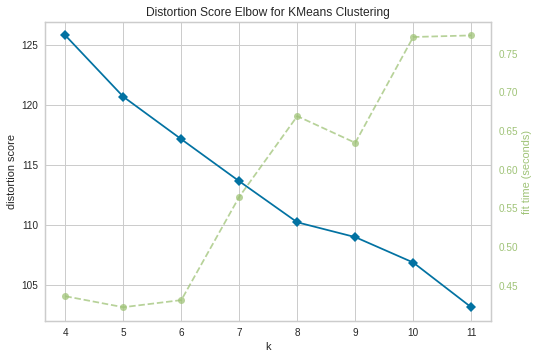

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(tfidf_matrix)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [38]:
from sklearn.cluster import KMeans

num_clusters = 8

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 1.44 s, sys: 2.17 ms, total: 1.44 s
Wall time: 643 ms


In [39]:
country = df['country'].to_list()
date = df['year'].to_list()
text = df['clean_title'].to_list()
countries = df['country'].to_list()

constitutions = {'country': country, 'date':date, 'text': text, 'cluster': clusters }

frame = pd.DataFrame(constitutions, index = [clusters] , columns = ['country', 'date', 'cluster', 'text'])

KeyError: 'country'

In [ ]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

In [ ]:
grouped = frame['date'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

grouped.mean() #average rank (1 to 100) per cluster

In [24]:
import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [25]:
from collections import Counter
values=np.ones(10)
Counter(clusters)

Counter({0: 37, 1: 36, 3: 30, 2: 23, 4: 13, 6: 30, 5: 37})

In [26]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [40]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e', 5: '#ada397', 6: '#034f84', 7: '#80ced6'}

#set up cluster names using a dict
cluster_names = {0: '0', 
                 1: '1', 
                 2: '2', 
                 3: '3',
                 4: '4',
                 5: '5',
                 6: '6',
                 7: '7',
                }

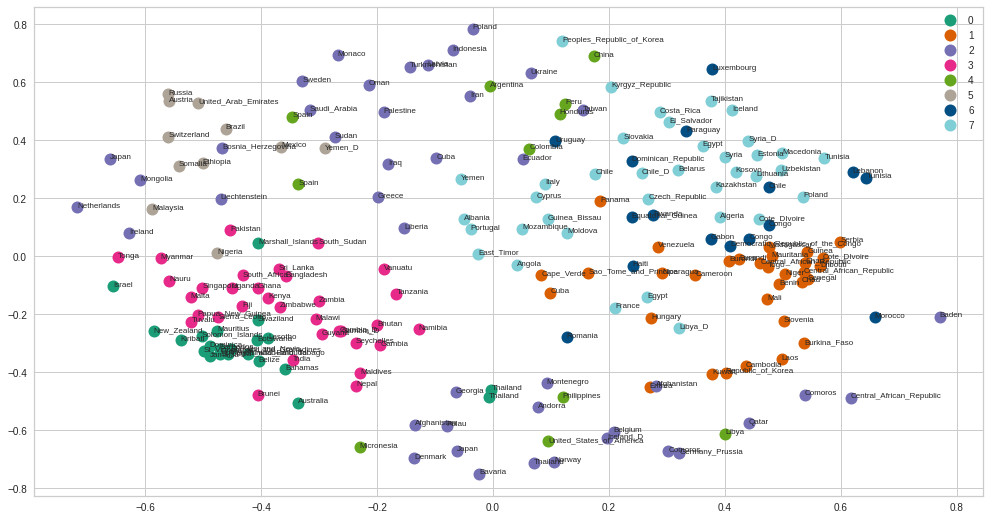

<Figure size 432x288 with 0 Axes>

In [41]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=country)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df['x'][i], df['y'][i], df['title'][i], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('clusters_small_noaxes.png', dpi=200)

In [ ]:
df

# References

In [ ]:
'''
TEXTS
1) https://www.constituteproject.org/constitutions?lang=en

CLUSTERING
2) http://brandonrose.org/clustering_mobile
3) https://towardsdatascience.com/a-friendly-introduction-to-text-clustering-fa996bcefd04
4) https://medium.com/data-hackers/text-analytics-nlp-utilizando-python-aa902c338fe8
'''